# Mobile Phone Price Range Classification

This notebook implements a classification model to predict mobile phone price ranges (budget, mid-range, flagship) based on various features. We'll go through the following steps:

1. Data Loading and Initial Exploration
2. Data Preprocessing and Cleaning
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Model Training and Evaluation
6. Results Visualization

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [21]:
df = pd.read_csv('data.csv')

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\nFirst few rows of the dataset:")
df.head()

Dataset Shape: (2000, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g    

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Quality Check
Let's check for missing values and basic statistics of our features.

In [22]:
print("Missing values in the dataset:")
print(df.isnull().sum())

print("\nBasic statistics of numerical features:")
print(df.describe())

Missing values in the dataset:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Basic statistics of numerical features:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000  

## Exploratory Data Analysis (EDA)

Let's analyze the distribution and relationships of key features that might influence the phone's price range. We'll look at:
1. Distribution of important numerical features
2. Relationship between features
3. Feature correlations with price range

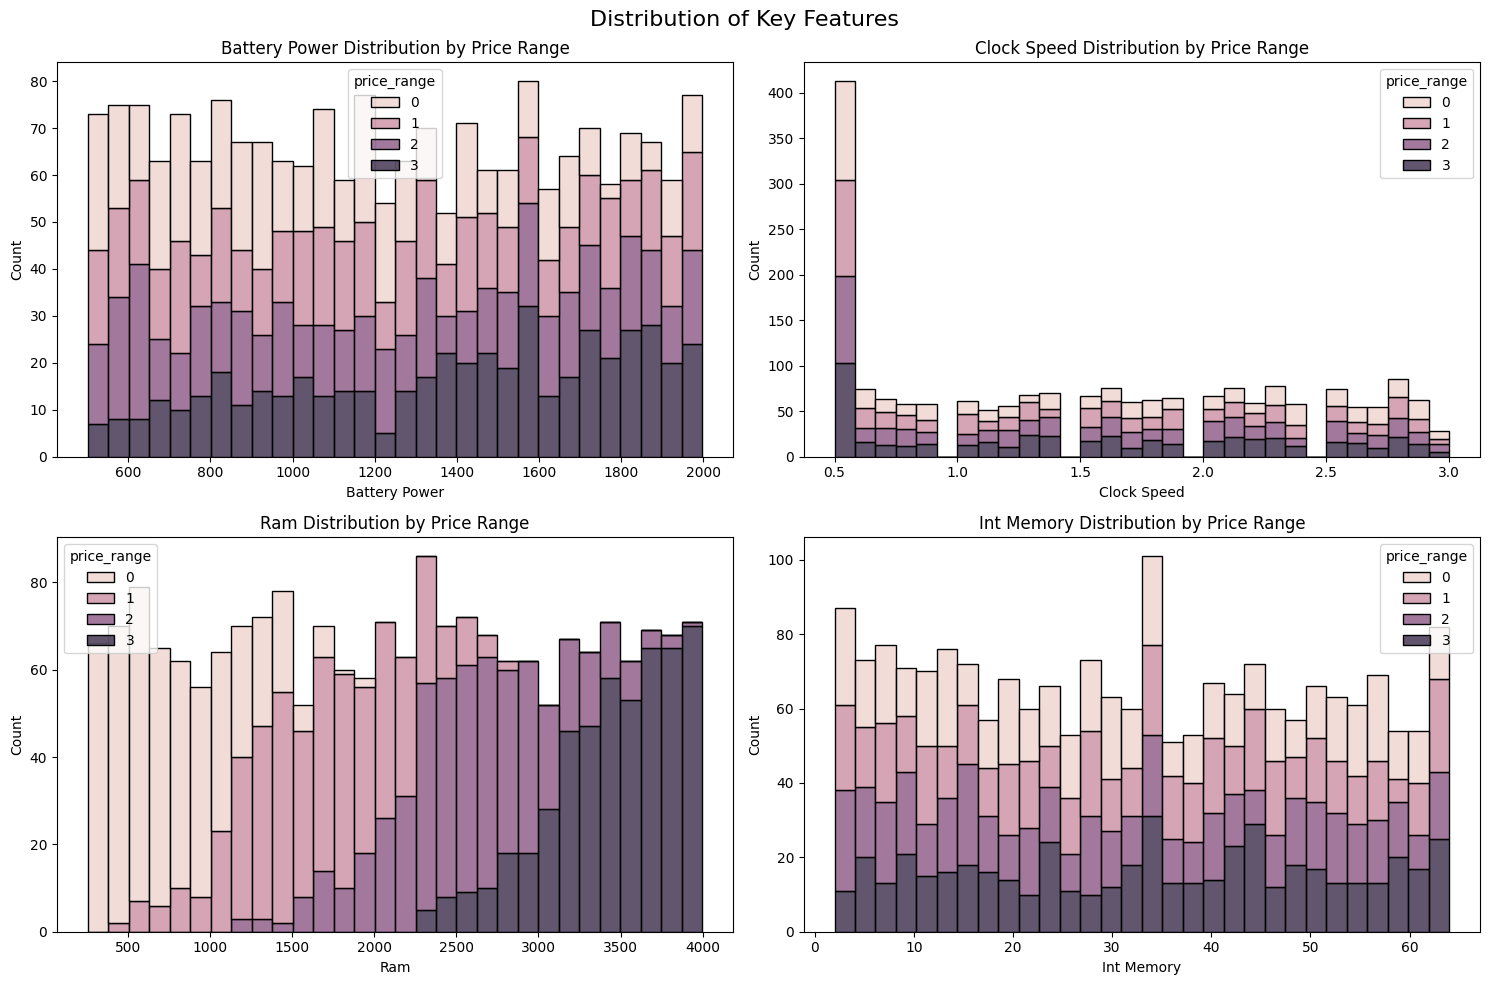

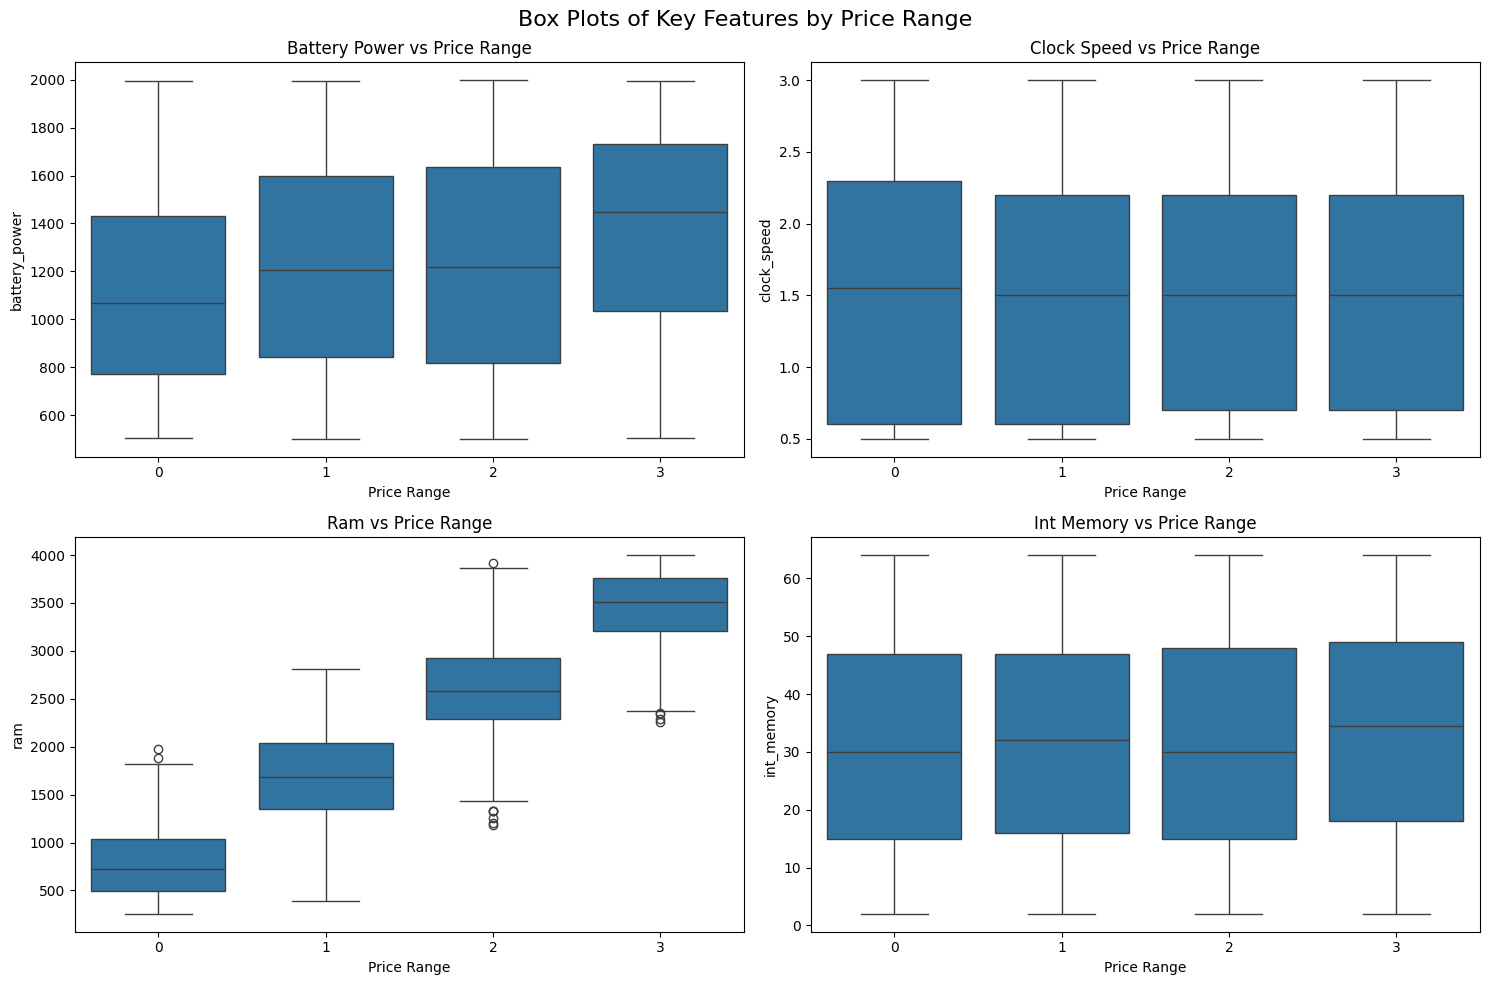

In [23]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Key Features', fontsize=16)

features_to_plot = ['battery_power', 'clock_speed', 'ram', 'int_memory']
for idx, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, idx)
    sns.histplot(data=df, x=feature, hue='price_range', multiple="stack", bins=30)
    plt.title(f'{feature.replace("_", " ").title()} Distribution by Price Range')
    plt.xlabel(feature.replace("_", " ").title())
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
plt.suptitle('Box Plots of Key Features by Price Range', fontsize=16)

for idx, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, idx)
    sns.boxplot(data=df, x='price_range', y=feature)
    plt.title(f'{feature.replace("_", " ").title()} vs Price Range')
    plt.xlabel('Price Range')
    
plt.tight_layout()
plt.show()

## Price Range Distribution Analysis

Let's analyze the distribution of mobile phones across different price categories:
- **Price Range 0**: Budget Phones
- **Price Range 1**: Mid-Range Phones
- **Price Range 2**: High-End Phones
- **Price Range 3**: Flagship Phones

This will help us understand the balance of our dataset across different price segments.

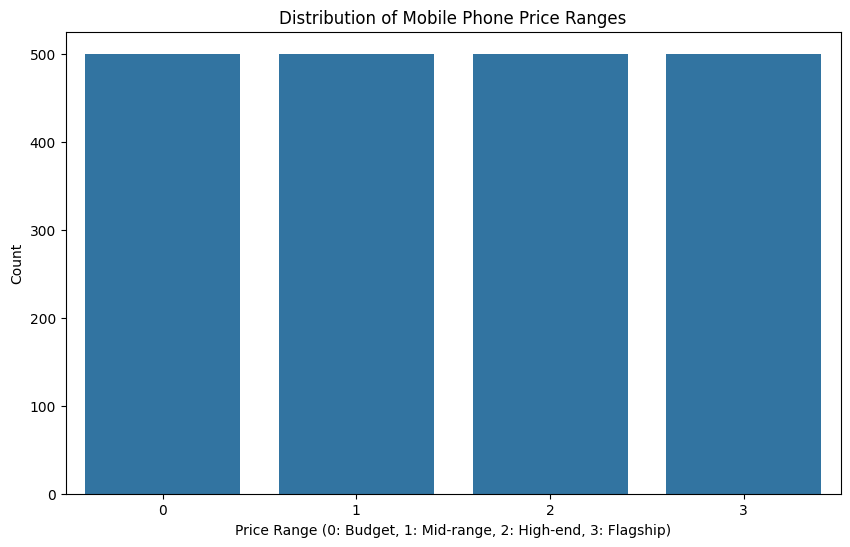


Price Range Distribution:
price_range
1    25.0
2    25.0
3    25.0
0    25.0
Name: proportion, dtype: float64


C:\Users\Wishaq Akbar\AppData\Local\Temp\ipykernel_7616\1553814679.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Budget', 'Mid-Range', 'High-End', 'Flagship'])


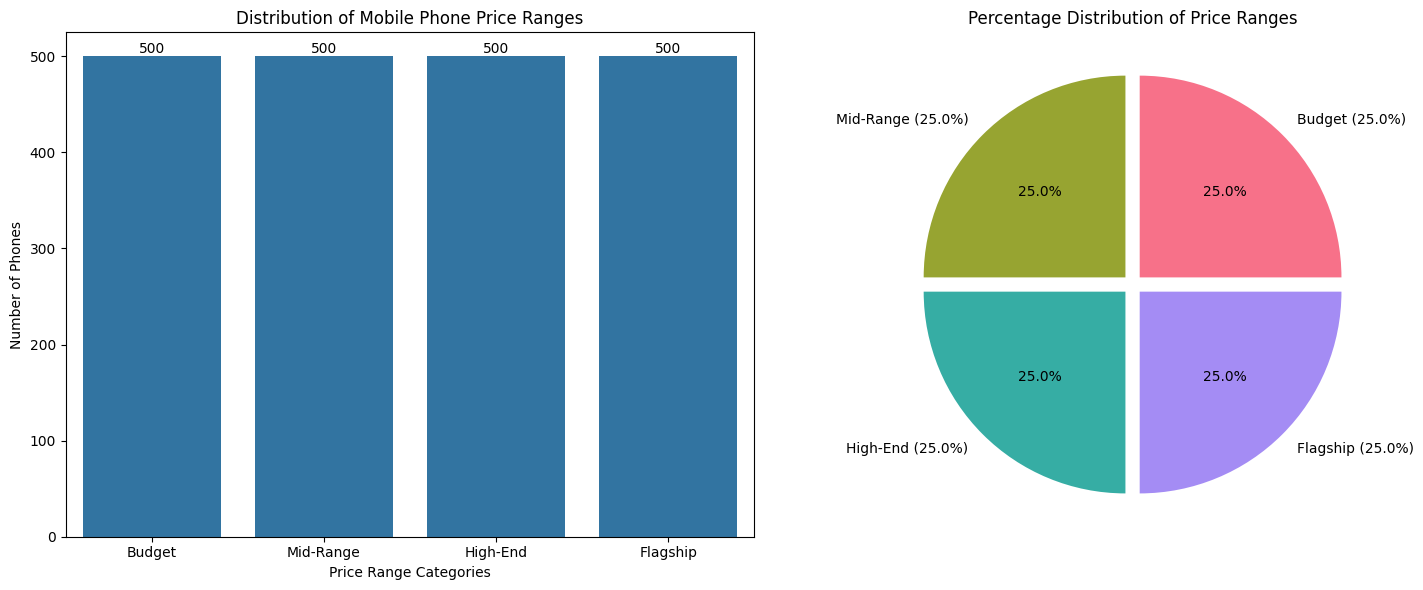


Detailed Price Range Distribution:

Count of phones in each category:
             Count  Percentage (%)
price_range                       
Budget         500            25.0
Mid-Range      500            25.0
High-End       500            25.0
Flagship       500            25.0


In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='price_range')
plt.title('Distribution of Mobile Phone Price Ranges')
plt.xlabel('Price Range (0: Budget, 1: Mid-range, 2: High-end, 3: Flagship)')
plt.ylabel('Count')
plt.show()

print("\nPrice Range Distribution:")
print(df['price_range'].value_counts(normalize=True).mul(100).round(2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=df, x='price_range', ax=ax1)
ax1.set_title('Distribution of Mobile Phone Price Ranges')
ax1.set_xlabel('Price Range Categories')
ax1.set_ylabel('Number of Phones')

for i in ax1.containers:
    ax1.bar_label(i, label_type='edge')

ax1.set_xticklabels(['Budget', 'Mid-Range', 'High-End', 'Flagship'])

value_counts = df['price_range'].value_counts()
total = len(df)
percentages = (value_counts / total * 100).round(2)

ax2.pie(value_counts, labels=[f'Budget ({percentages[0]}%)',
                             f'Mid-Range ({percentages[1]}%)',
                             f'High-End ({percentages[2]}%)',
                             f'Flagship ({percentages[3]}%)'],
        autopct='%1.1f%%',
        colors=sns.color_palette('husl', 4),
        explode=[0.05, 0.05, 0.05, 0.05])
ax2.set_title('Percentage Distribution of Price Ranges')

plt.tight_layout()
plt.show()

print("\nDetailed Price Range Distribution:")
print("\nCount of phones in each category:")
print(df['price_range'].value_counts().to_frame('Count').join(
    df['price_range'].value_counts(normalize=True).mul(100).round(2).to_frame('Percentage (%)')
).sort_index().rename(index={0: 'Budget', 1: 'Mid-Range', 2: 'High-End', 3: 'Flagship'}))

In [25]:
price_distribution = df['price_range'].value_counts().sort_index()
price_percentages = (price_distribution / len(df) * 100).round(2)

summary_df = pd.DataFrame({
    'Count': price_distribution,
    'Percentage (%)': price_percentages
})
summary_df.index = ['Budget (0)', 'Mid-Range (1)', 'High-End (2)', 'Flagship (3)']

print("Detailed Mobile Phone Distribution by Price Range:")
print("\nTotal number of phones:", len(df))
print("\nDistribution:")
print(summary_df)

is_equal = np.allclose(price_percentages, 25.0)
print(f"\nIs the distribution exactly equal (25% each)? {is_equal}")

std_dev = price_percentages.std()
print(f"Standard deviation of percentages: {std_dev:.2f}%")

Detailed Mobile Phone Distribution by Price Range:

Total number of phones: 2000

Distribution:
               Count  Percentage (%)
Budget (0)       500            25.0
Mid-Range (1)    500            25.0
High-End (2)     500            25.0
Flagship (3)     500            25.0

Is the distribution exactly equal (25% each)? True
Standard deviation of percentages: 0.00%


## Feature Correlation Analysis
Let's examine the correlation between different features and the price range.

### Feature Relationships Analysis
Let's examine the relationships between different features using scatter plots and pair plots. This will help us understand how features interact with each other and influence the price range.

<Figure size 1200x800 with 0 Axes>

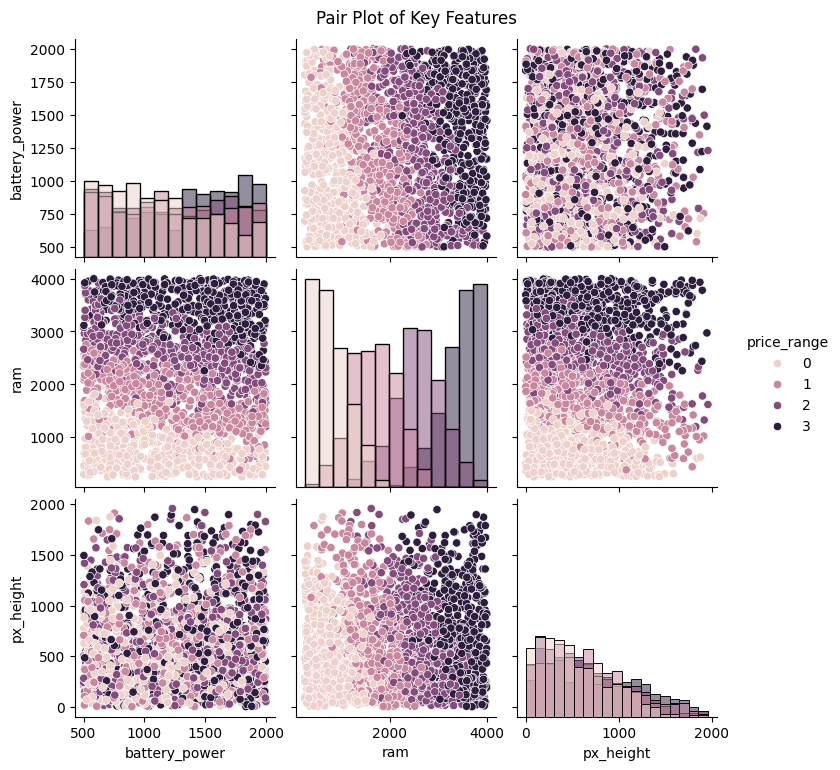

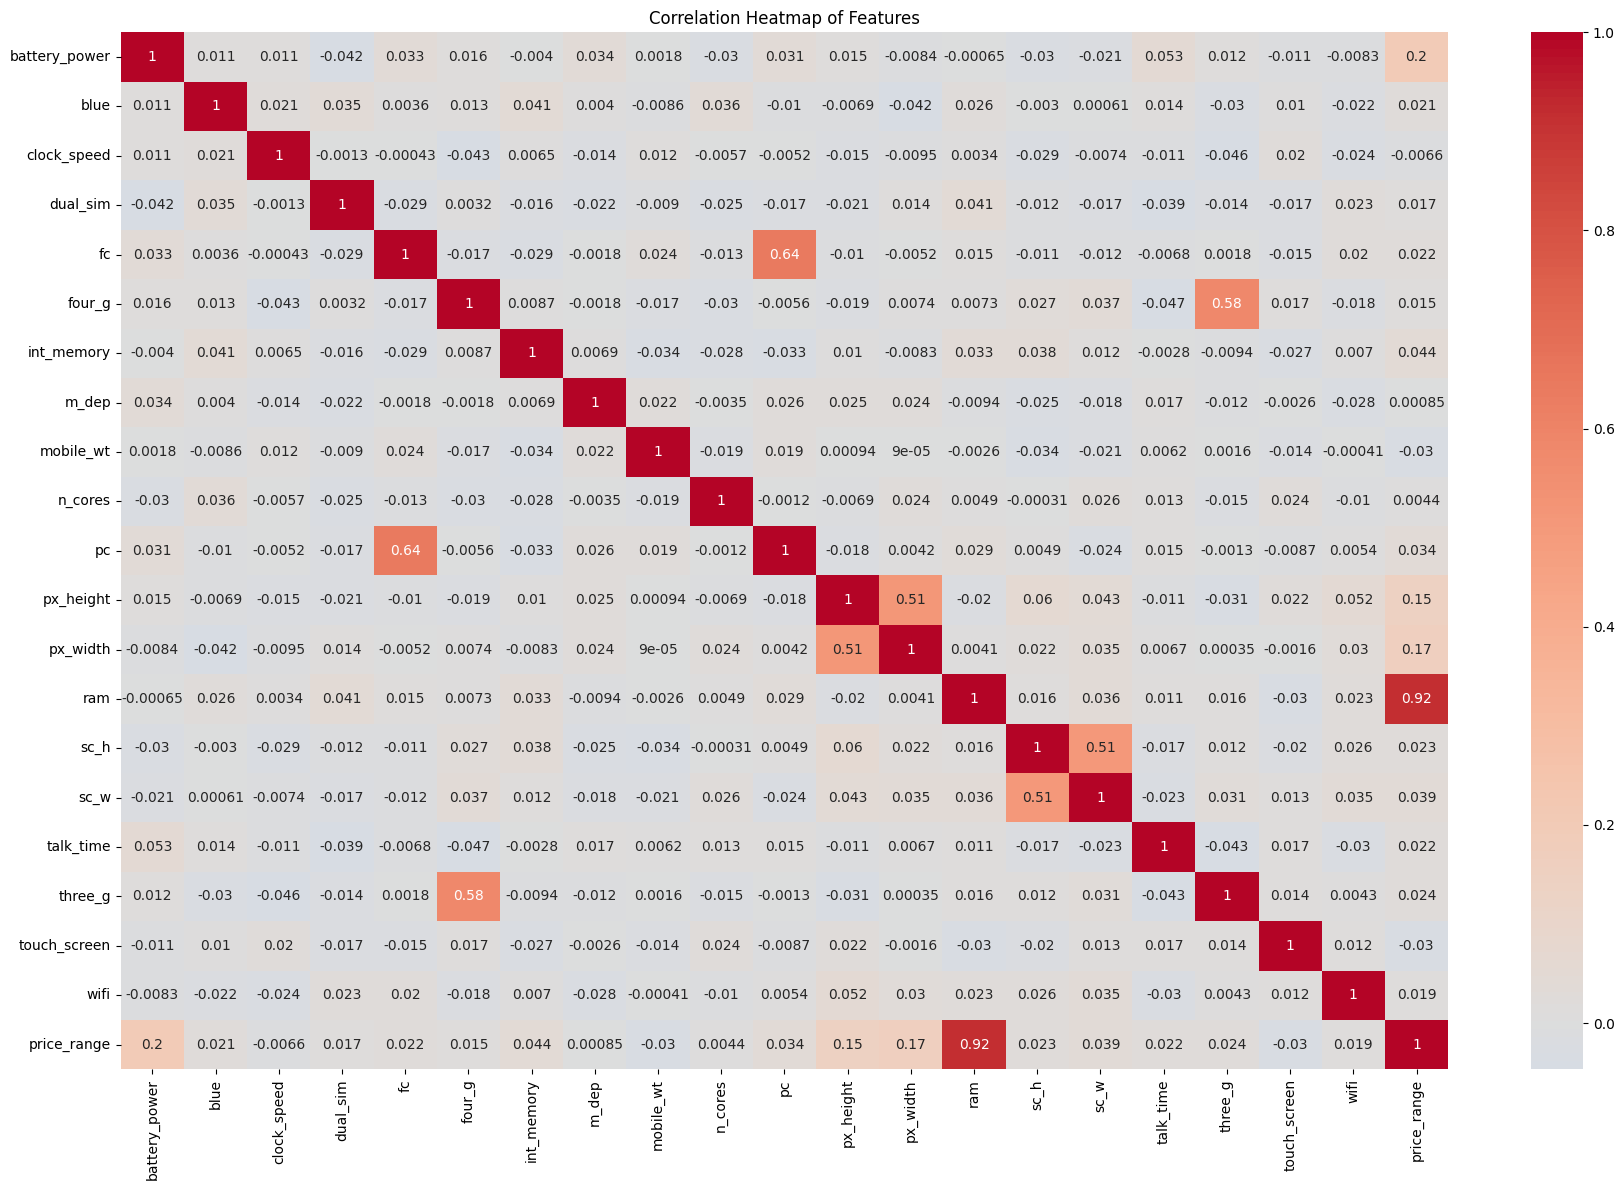

In [26]:
key_features = ['battery_power', 'ram', 'px_height', 'price_range']
plt.figure(figsize=(12, 8))
sns.pairplot(df[key_features], hue='price_range', diag_kind='hist')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

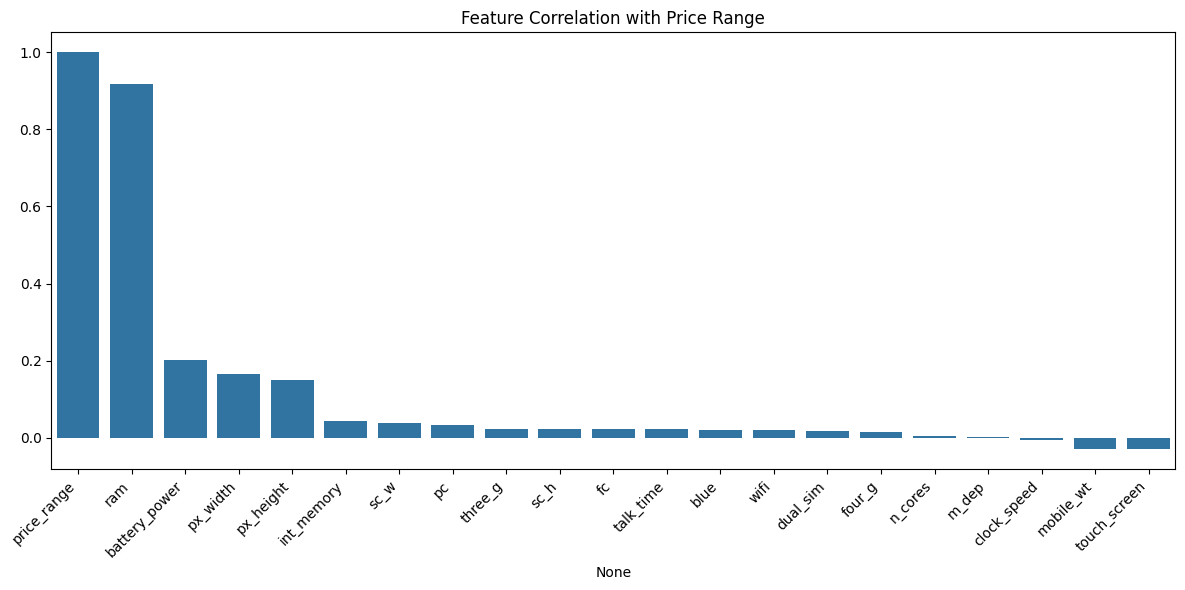


Top 5 most correlated features with price range:
price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
Name: price_range, dtype: float64


In [27]:
correlations = df.corr()['price_range'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Correlation with Price Range')
plt.tight_layout()
plt.show()

print("\nTop 5 most correlated features with price range:")
print(correlations.head())

## Feature Engineering
Let's create some meaningful features and prepare our data for modeling.

In [28]:
df['screen_area'] = df['sc_w'] * df['sc_h']
df['total_pixels'] = df['px_width'] * df['px_height']
df['pixel_density'] = df['total_pixels'] / df['screen_area']
df['has_connectivity'] = (df['wifi'] | df['three_g'] | df['four_g']).astype(int)

print("Dataset with engineered features:")
df[['screen_area', 'total_pixels', 'pixel_density', 'has_connectivity']].head()

Dataset with engineered features:


,screen_area,total_pixels,pixel_density,has_connectivity
0,63,15120,240.000000,1
1,51,1799140,35277.254902,1
2,22,2167308,98514.000000,1
3,128,2171776,16967.000000,1
4,16,1464096,91506.000000,1


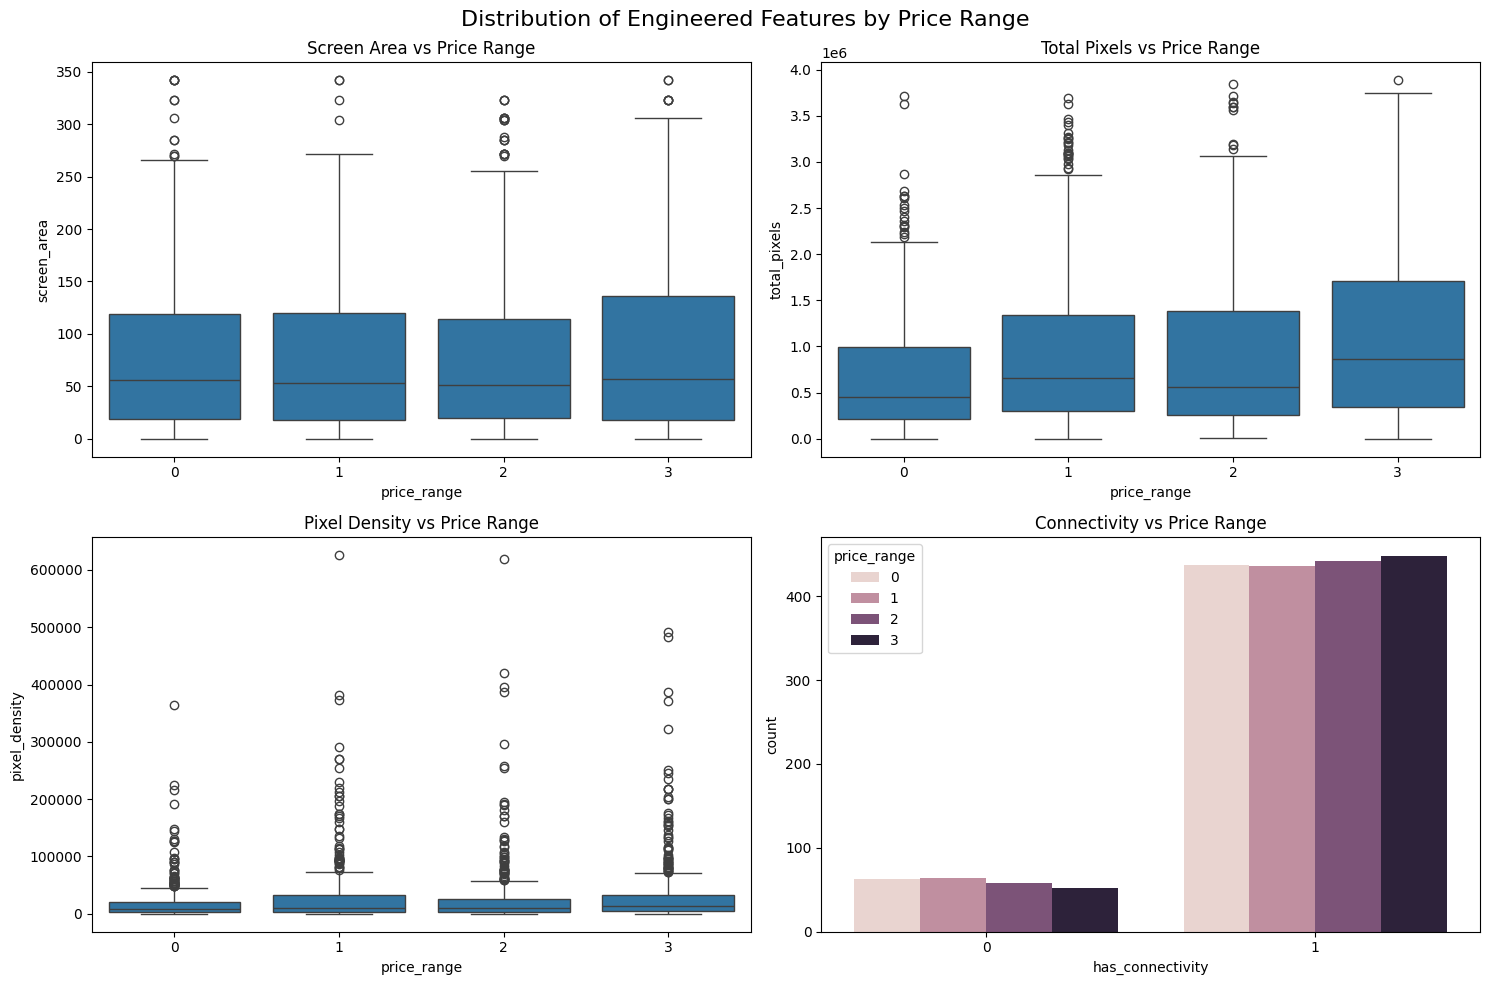

In [29]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Engineered Features by Price Range', fontsize=16)

engineered_features = ['screen_area', 'total_pixels', 'pixel_density', 'has_connectivity']
for idx, feature in enumerate(engineered_features, 1):
    plt.subplot(2, 2, idx)
    if feature == 'has_connectivity':
        sns.countplot(data=df, x=feature, hue='price_range')
        plt.title('Connectivity vs Price Range')
    else:
        sns.boxplot(data=df, x='price_range', y=feature)
        plt.title(f'{feature.replace("_", " ").title()} vs Price Range')
    
plt.tight_layout()
plt.show()

## Data Preprocessing
Let's prepare our data for modeling by scaling the features and splitting the dataset.

In [30]:
features = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 
           'n_cores', 'pc', 'ram', 'screen_area', 'total_pixels', 'pixel_density',
           'has_connectivity', 'talk_time']

X = df[features]
y = df['price_range']

X.isnull().sum()

battery_power       0
clock_speed         0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
ram                 0
screen_area         0
total_pixels        0
pixel_density       1
has_connectivity    0
talk_time           0
dtype: int64

In [31]:
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())
X.head()

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,n_cores,pc,ram,screen_area,total_pixels,pixel_density,has_connectivity,talk_time
0,842,2.2,7,0.6,188,2,2,2549,63,15120,240.000000,1,19
1,1021,0.5,53,0.7,136,3,6,2631,51,1799140,35277.254902,1,7
2,563,0.5,41,0.9,145,5,6,2603,22,2167308,98514.000000,1,9
3,615,2.5,10,0.8,131,6,9,2769,128,2171776,16967.000000,1,11
4,1821,1.2,44,0.6,141,2,14,1411,16,1464096,91506.000000,1,15


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)

Training set shape: (1600, 13)
Testing set shape: (400, 13)


## Model Training and Evaluation
Let's train a Random Forest Classifier and evaluate its performance.

## Feature Engineering

To improve our model's performance, we'll create new meaningful features:

1. **Screen Area**: Calculate the total screen area using width and height
2. **Total Pixels**: Compute the total number of pixels in the display
3. **Pixel Density**: Calculate pixels per unit area (screen quality indicator)
4. **Connectivity Score**: Create a binary indicator for device connectivity

These engineered features will help capture more complex relationships in the data.

### Model Training and Evaluation

We'll use a Random Forest Classifier for our prediction task because:
1. It handles non-linear relationships well
2. Provides feature importance rankings
3. Less prone to overfitting
4. Works well with both numerical and categorical features

We'll evaluate the model using:
1. Overall accuracy
2. Per-class precision, recall, and F1-score
3. Confusion matrix for detailed error analysis
4. Feature importance for insights into decision-making

Model Accuracy: 88.75%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.87      0.85      0.86        91
           2       0.80      0.83      0.81        92
           3       0.93      0.90      0.91       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



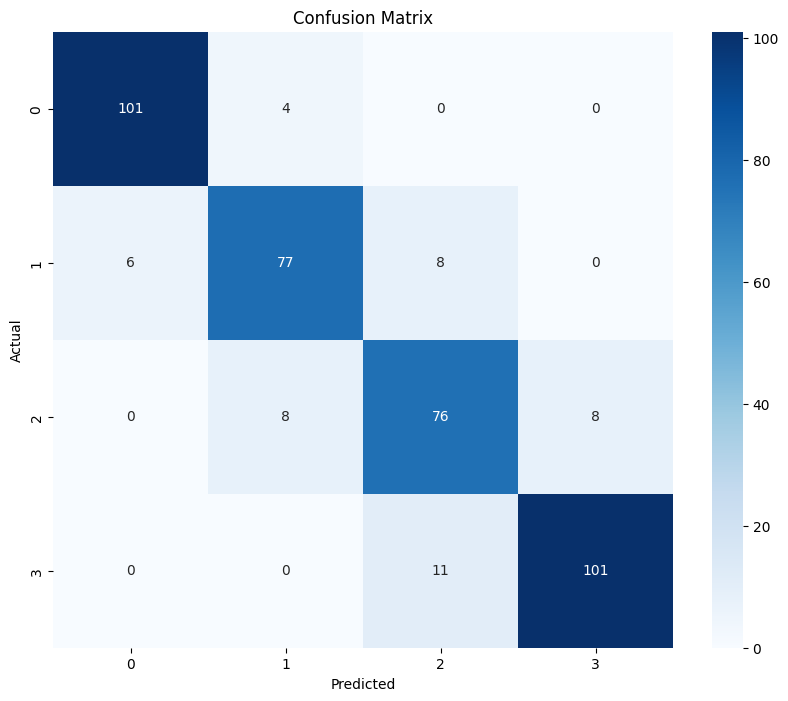

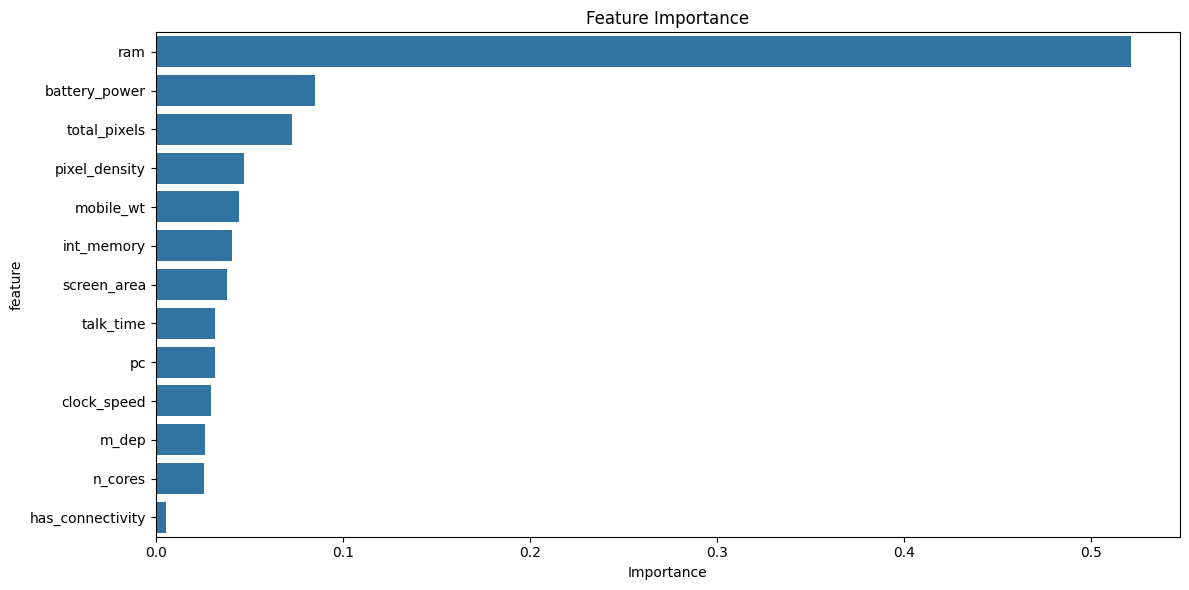

In [34]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

print("Model Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()